In [126]:
import data_functions as dat
import importlib
import itertools
import math
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import pyDOE2 as pyd
import ri_water_model as wm
import scipy.optimize as sco
import setup_analysis as sa
import time

importlib.reload(dat)
importlib.reload(sa)


<module 'setup_analysis' from '/Users/jsyme/Documents/Projects/git_jbus/dmdu_scalable_computing_2022/crdm_project/python/setup_analysis.py'>

In [7]:
# read in input data
df_model_data = pd.read_csv(sa.fp_csv_baseline_trajectory_model_input_data)
df_climate_deltas_annual = pd.read_csv(sa.fp_csv_climate_deltas_annual)

In [34]:
#df_model_data

<AxesSubplot:xlabel='time_period'>

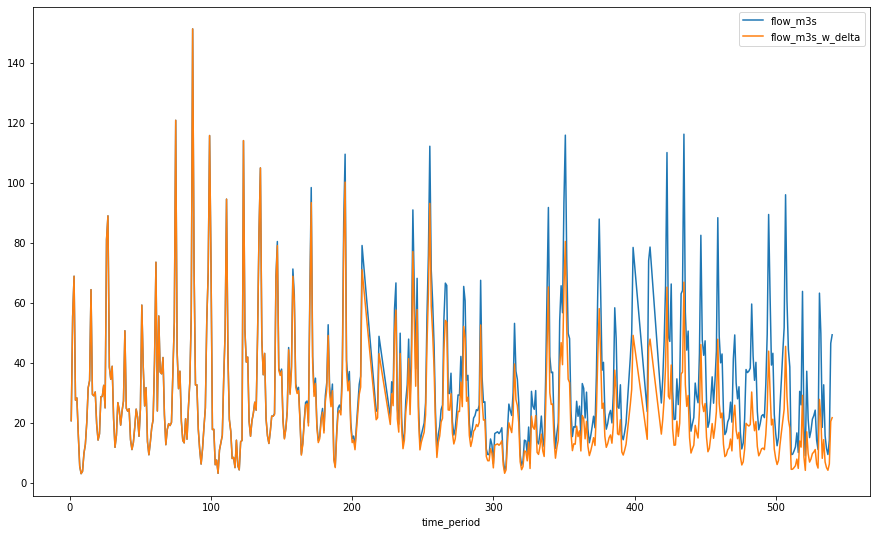

In [36]:
field_apply = "flow_m3s"

df_apply_data = dat.apply_delta_factor(
    df_model_data[["time_period", "year", "month", field_apply]], 
    -0.4,
    sa.range_delta_base, 
    sa.range_delta_fut, 
    2022,
    field_apply
)

fig, ax = plt.subplots(figsize = (15, 9))
df_apply_data.plot(x = "time_period", y =[field_apply, f"{field_apply}_w_delta"], ax = ax)

In [125]:
all_climates = list(df_climate_deltas_annual["climate_id"])


    

    
   

,year,month,flow_m3s,precipitation_mm
0,2011,1,20.641764,14.573333
1,2011,2,55.313316,22.716667
2,2011,3,68.785200,22.850000
3,2011,4,27.502083,16.800000
4,2011,5,28.211211,40.400000
...,...,...,...,...
10075,2055,8,11.364219,7.500000
10076,2055,9,9.363420,0.000000
10077,2055,10,14.124015,2.000000
10078,2055,11,46.444056,11.800000


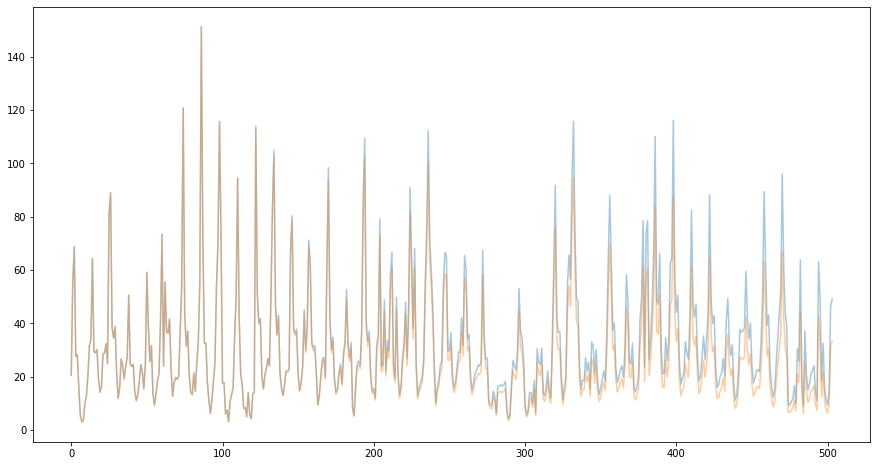

In [111]:
field_y = "flow_m3s"

fig, ax = plt.subplots(figsize = (15, 8))

for i in [0, 19]:
    df_tmp = df_out[df_out["climate_id"] == i]
    x = np.arange(len(df_tmp))
    y = np.array(df_tmp[field_y])
    
    ax.plot(x, y, label = f"climate {i}", alpha = 0.4)

plt.show()